# Gradient Boost com XGBoost

```python
# Importando bibliotecas essenciais e dados

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [8]:
dataset_train = pd.read_csv("Airline-Passenger-Satisfaction/data/train_processed.csv")
dataset_test = pd.read_csv("Airline-Passenger-Satisfaction/data/test_processed.csv")

In [9]:
dataset_train.head(5)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,...,0.56250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,...,0.18750,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,...,0.28125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,...,0.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [10]:
dataset_test.head(5)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.026050,1.0,0.8,0.6,0.8,0.6,0.8,0.6,1.0,1.0,...,1.3750,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.571890,0.2,0.2,0.6,0.2,1.0,0.8,1.0,0.8,0.8,...,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.032512,0.4,0.0,0.4,0.8,0.4,0.4,0.4,0.4,0.8,...,0.0000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.675687,0.0,0.0,0.0,0.4,0.6,0.8,0.8,0.2,0.2,...,0.1875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.232431,0.4,0.6,0.8,0.6,0.8,0.2,0.4,0.4,0.4,...,0.6250,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [11]:
from sklearn.model_selection import train_test_split

X_train = dataset_train.drop("satisfaction_satisfied",axis=1)
y_train = dataset_train["satisfaction_satisfied"]

X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_test = dataset_test.drop("satisfaction_satisfied",axis=1)
y_test = dataset_test["satisfaction_satisfied"]

```python
# Aqui abaixo printamos o tamanho de cada conjunto de dados
from import matplotlib.pyplot as plt
import seaborn as sns

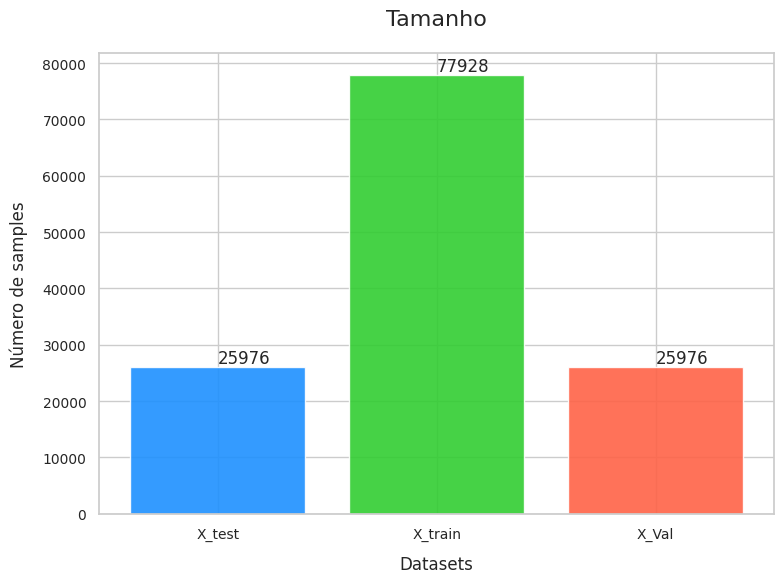

In [25]:
sns.set(style="whitegrid")

# Tamanho de cada conjunto
X_test_samples = X_test.shape[0]
X_train_samples = X_train.shape[0]
X_Val_samples = X_Val.shape[0]

# Setando a posição e valor de cada
sizes = [X_test_samples, X_train_samples, X_Val_samples]
labels = ['X_test', 'X_train', 'X_Val']
colors = ['dodgerblue', 'limegreen', 'tomato']  # Colors for each bar

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=colors, alpha=0.9)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom')

plt.xlabel('Datasets', fontsize=12, labelpad=10)
plt.ylabel('Número de samples', fontsize=12, labelpad=10)
plt.title('Tamanho', fontsize=16, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Importando GradientBoosting
```python
from sklearn.ensemble import GradientBoostingClassifier

In [27]:

from sklearn.ensemble import GradientBoostingClassifier

```python
# Vamos então testar uma instância simples de GradientBoosting e testar sua acurácia
from sklearn.metrics import accuracy_score

In [31]:
Test_Model = GradientBoostingClassifier()
Test_Model.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
def simple_performance(modelo):
    percent = modelo.predict(X_test)
    resultado = accuracy_score(y_test,percent)
    print(resultado)
    total_errors = (y_test != percent).sum()
    print(X_test.shape[0], total_errors)


simple_performance(Test_Model)

0.9409069910686788
25976 1535


#### Resultados iniciais
```python
# Conseguimos um resultado interessante com uma abordagem direta, vamos realizar um teste arbitrário de hiperparâmetros

In [41]:
Segundo_teste = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)
Segundo_teste.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [45]:
simple_performance(Segundo_teste)

0.8896288882044965
25976 2867


#### Resultados
```python
# Regredimos o bom resultado inicial, portanto é fundamental utilizar uma ferramenta para encontrar um resultado interessante para hiperparâmetros
